 #**Problem Statement:**
 
 Given data about COVID-19 patients, write code to visualize the impact and
 analyze the trend of rate of infection and recovery as well as make predictions
 about the number of cases expected a week in future based on the current
 trends.

 #**Guidelines:**
 
  ● Usepandas to accumulate data from multiple data files
  
  ● Useplotly (visualization library) to create interactive visualizations.
  
  ● UseFacebook prophet library to make time series models.
  
  ● Visualize the prediction by combining these technologies.


---

# **Problem Statement**


* visualizations of **Deaths**, **Recovered**, and **Active** cases for each country.

---

###  Percentage Analysis (Country-wise & Region-wise)**

* Calculate the **percentage of **Deaths** ,**Active**,and  **Recoveries** with respect to **Confirmed cases**.
* Identify:

  * The country/region with the **lowest** death and recovery percentage.
  * The country/region with the **highest** death and recovery percentage.

---

###  Highest Numbers (Country-wise)**

* Determine which country has the **highest number** of:

  * Active cases
  * Confirmed cases
  * Recovered cases
  * Deaths

---

###  Region-wise Rate Analysis**

* Identify the region with:

  * **Lowest recovery rate**
  * **Highest death rate**
  * **Highest active rate**
    (All calculated with respect to confirmed cases)

---

###  Best-Performing Regions**

* Identify the region with:

  * **Highest recovery rate**
  * **Lowest death rate**
  * **Lowest active cases**
    (With respect to confirmed cases)

---

###  Confirmed Cases (Region-wise)**

* Find the region with the **highest number of confirmed cases**.
* Find the region with the **lowest number of confirmed cases**.

---
### FBProphet time-series forecasting algorithm to predict future confirmed COVID-19 cases**
* In this project, I implemented the FBProphet time-series forecasting algorithm to predict future confirmed COVID-19 cases. The model was trained on historical case data to capture long-term trends, seasonal effects, and overall growth patterns.
---
### **Note**

Perform the above analysis:

1. **First country-wise**
2. **Then region-wise**

---

In [ ]:
pip install plotly
pip install prophet

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet

In [103]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [104]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [110]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [111]:
df.shape

(49068, 10)

Visulization of Deth,Recovred,and Active cases country wise.

what is the percentage of death ,recovery with respect of confirmed cases and in which country it is low and in which country/region it is highe.

In which country we have the higher number of active , confirmed , recovered and deaths cases.

In which region there is less Recovery , higher death ,and highe active rate with ther respect of confirmed cases.

In which region there is hihe recovery , low death  rate and low active cases with the respect of confirmed cases.

In which region there is highest confrimed cases and lowest confirmed cases 

  first country wise then region wise


In [112]:
df['Country/Region'].nunique()

187

In [113]:
df['WHO Region'].nunique()

6

In [114]:
df_region = df.groupby('WHO Region')[['Confirmed','Deaths','Recovered','Active']].sum()
                            

###  Region-wise Rate Analysis**

* Identify the region with:

  * **Lowest recovery rate**
  * **Highest death rate**
  * **Highest active rate**
    (All calculated with respect to confirmed cases)

---

In [115]:
df_region

,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Africa,21791827,439978,11193730,10158119
Americas,402261194,19359292,157069444,225832458
Eastern Mediterranean,74082892,1924029,48050703,24108160
Europe,248879793,19271040,123202075,106406678
South-East Asia,55118365,1458134,30030327,23629904
Western Pacific,26374411,932430,18861950,6580031


In [116]:
df_region = df_region.reset_index()
print(df_region.columns)

Index(['WHO Region', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')


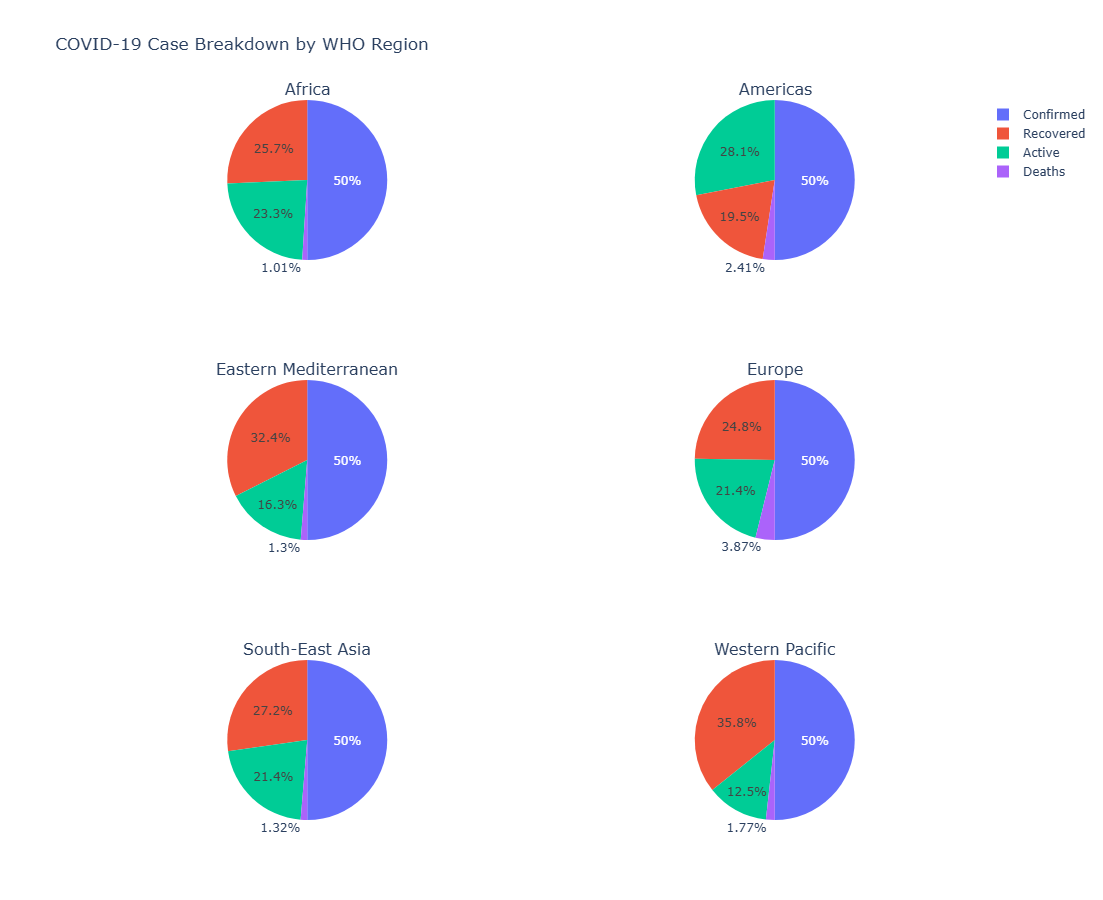

In [117]:

# List of regions to include
regions = [
    "Africa",
    "Americas",
    "Eastern Mediterranean",
    "Europe",
    "South-East Asia",
    "Western Pacific"
]

# Create subplot (3 rows, 2 columns)
fig = make_subplots(
    rows=3, cols=2,
    specs=[
        [{"type": "domain"}, {"type": "domain"}],
        [{"type": "domain"}, {"type": "domain"}],
        [{"type": "domain"}, {"type": "domain"}]
    ],
    subplot_titles=regions
)

row, col = 1, 1

for region in regions:
    # Filter the region
    reg_data = df_region[df_region["WHO Region"] == region].iloc[0]

    # Add the pie chart
    fig.add_trace(
        go.Pie(
            labels=["Confirmed", "Deaths", "Recovered", "Active"],
            values=[
                reg_data["Confirmed"],
                reg_data["Deaths"],
                reg_data["Recovered"],
                reg_data["Active"]
            ],
            name=region
        ),
        row=row, col=col
    )

    # Move to next subplot cell
    col += 1
    if col == 3:  
        col = 1
        row += 1

fig.update_layout(
    title="COVID-19 Case Breakdown by WHO Region",
    height=900
)

fig.show()



---

# **Insight**

* **Africa** has the highest number of confirmed cases, but still its recovery rate and death rate are good compared with **America**.

* **Europe** is performing the worst considering the death percentage on overall confirmed cases across the WHO regions.

* The **Western Pacific** region has the highest recovery rate across the WHO regions.

* **America and Europe** has higher death percentages on overall cases, with **2.41%** and **3.87%** respectively. Recovery is also low in America.

---

---

###  Highest Numbers (Country-wise)**

* Determine which country has the **highest number** of:

  * Active cases
  * Confirmed cases
  * Recovered cases
  * Deaths

---

In [119]:
cases_confirmed = (
    df.groupby('Country/Region')[['Confirmed','Deaths','Recovered','Active']]
      .sum()
      .reset_index()
      .sort_values('Confirmed', ascending=False)
)

In [120]:
cases_confirmed.head(20)

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
177,United Kingdom,26748587,3997775,126217,22624595
85,Italy,26745145,3707717,15673910,7363518
61,France,21210926,3048524,7182115,10980287
65,Germany,21059152,871322,17107839,3079991
81,Iran,19339267,1024136,15200895,3114236



# **Insight:**

*The United States, Brazil, Russia, India, and Spain are the countries with the highest number of confirmed cases detected.*


In [121]:
cases_deaths = (
    df.groupby('Country/Region')[['Confirmed','Deaths','Recovered','Active']]
      .sum()
      .reset_index()
      .sort_values('Deaths', ascending=False)
)

In [122]:
cases_deaths.head(20)

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
177,United Kingdom,26748587,3997775,126217,22624595
23,Brazil,89524967,3938034,54492873,31094060
85,Italy,26745145,3707717,15673910,7363518
61,France,21210926,3048524,7182115,10980287
157,Spain,27404045,3033030,15093583,9277432
111,Mexico,14946202,1728277,11141225,2076700
79,India,40883464,1111831,23783720,15987913
81,Iran,19339267,1024136,15200895,3114236
16,Belgium,6281116,963679,1627492,3689945



# **Insight:**

*The United States, United Kingdom, Brazil	, Italy, and France are the countries with the highest number of death cases detected.


In [123]:
cases_recovered =  (
    df.groupby('Country/Region')[['Confirmed','Deaths','Recovered','Active']]
      .sum()
      .reset_index()
      .sort_values('Recovered', ascending=False)
)

In [124]:
cases_recovered.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
65,Germany,21059152,871322,17107839,3079991



# **Insight:**

*The United States, Brazil, Russia, India, and Germany are the countries with the highest number of Active cases detected.*



In [125]:
cases_active = (df.groupby('Country/Region')[['Confirmed','Deaths','Recovered','Active']]
      .sum()
      .reset_index()
      .sort_values('Active', ascending=False)
)

In [126]:
cases_active.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
177,United Kingdom,26748587,3997775,126217,22624595
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913



###  Percentage Analysis (Country-wise & Region-wise)**

* Calculate the **percentage of **Deaths** ,**Active**,and  **Recoveries** with respect to **Confirmed cases**.
* Identify:

  * The country/region with the **lowest** death and recovery percentage.
  * The country/region with the **highest** death and recovery percentage.

---


In [127]:
cases['Death_Percentage'] = (cases['Deaths'] / cases['Confirmed']) * 100


In [162]:
cases.sort_values('Death_Percentage', ascending=False).head(20)

,Country/Region,Confirmed,Deaths,Recovered,Active,Death_Percentage,Recovered_Percentage,Active_%
184,Yemen,67180,17707,23779,25694,26.357547,35.395951,38.246502
16,Belgium,6281116,963679,1627492,3689945,15.342481,25.910873,58.746646
177,United Kingdom,26748587,3997775,126217,22624595,14.945743,0.471864,84.582393
61,France,21210926,3048524,7182115,10980287,14.372423,33.860450,51.767127
85,Italy,26745145,3707717,15673910,7363518,13.863140,58.604693,27.532167
77,Hungary,396247,51053,204205,140989,12.884135,51.534775,35.581090
120,Netherlands,5167516,622314,16967,4528235,12.042807,0.328340,87.628853
111,Mexico,14946202,1728277,11141225,2076700,11.563319,74.542181,13.894500
157,Spain,27404045,3033030,15093583,9277432,11.067819,55.077938,33.854243
11,Bahamas,12100,1203,6047,4850,9.942149,49.975207,40.082645



---

# **Insight of Death Percentage**

* The death percentage is highest in **Yemen, Belgium, United Kingdom, France, and Italy**. **Yemen** has the world’s highest death toll with **26%+ approx.** In the future, the death rate may worsen because the number of confirmed cases is low but deaths are still high. So the **Yemen administration** should take care of health care facilities, public awareness programs, and administrative policy control by spreading awareness.

* **Italy’s** recovery rate is good compared to **France, the United Kingdom, Belgium, and Yemen.** **But the death rate is still high**(why?) because the confirmed case frequency is high. The Italian government should take administrative steps to control public gatherings and spread awareness programs. Then the death rate may be controlled.

* **Hungary** has approximately the same situation as Italy.

* The **United Kingdom** has the worst recovery rate at around **0.47**, and the same situation exists in the **Netherlands**, which has around **0.32**. In the future, the death rate may be high because both countries have high active cases. So administrative policy and public awareness are important.

* **Mexico and Chad** are doing well; in the future, the death rate could be near stable.

* **Canada’s** death rate may erupt because the recovery rate is almost zero.

---

# **Conclusion**

All the countries have to focus on the health care system, public campaigns for precautions, and administrative policy control. Alongside this, they should also focus on **R&D in medicine**, and all countries should cooperate with each other so that the pandemic can come fully under control.

---

In [129]:
cases['Recovered_Percentage'] = (cases['Recovered'] / cases['Confirmed']) * 100


In [130]:
cases.sort_values('Recovered_Percentage', ascending=False).head()

,Country/Region,Confirmed,Deaths,Recovered,Active,Death_Percentage,Recovered_Percentage,Active_%
100,Liechtenstein,10351,116,9477,758,1.120665,91.556371,7.322964
68,Greenland,1507,0,1372,135,0.000000,91.041805,8.958195
78,Iceland,221241,1141,190132,29968,0.515727,85.938863,13.545410
167,Thailand,366527,6289,312360,47878,1.715835,85.221553,13.062612
121,New Zealand,175979,2181,149560,24238,1.239352,84.987413,13.773234


In [131]:
cases.sort_values('Recovered_Percentage', ascending=True).head(20)

,Country/Region,Confirmed,Deaths,Recovered,Active,Death_Percentage,Recovered_Percentage,Active_%
32,Canada,9356551,699566,0,8656985,7.476751,0.000000,92.523249
161,Sweden,4973160,448913,0,4524247,9.026715,0.000000,90.973285
117,Mozambique,58006,361,0,57645,0.622349,0.000000,99.377651
163,Syria,20946,973,0,19973,4.645278,0.000000,95.354722
168,Timor-Leste,2487,0,0,2487,0.000000,0.000000,100.000000
120,Netherlands,5167516,622314,16967,4528235,12.042807,0.328340,87.628853
177,United Kingdom,26748587,3997775,126217,22624595,14.945743,0.471864,84.582393
118,Namibia,28836,72,2152,26612,0.249688,7.462894,92.287419
76,Honduras,1228583,37941,135380,1055262,3.088192,11.019199,85.892610
22,Botswana,15306,120,2291,12895,0.784006,14.967986,84.248007



---

# **Insight of Recovery Percentage**

* **Liechtenstein, Greenland, Iceland, Thailand, and New Zealand** are doing well as of now.

* **Canada, Sweden, Mozambique, Syria, Timor-Leste, Netherlands, United Kingdom, Namibia**, and other countries must have deep concern about the recovery rate. They may need to improve health care facilities, administrative policies, public awareness, etc., because the active cases in these countries are on average **75%+ (by observation, not calculation)**. In the future, the death toll can increase.
  Special concern should be given to **Canada and Sweden** because their confirmed and death cases are high.

---

# **Conclusion**

All the countries have to focus on the health care system, public campaigns for precautions, and administrative policy control. Alongside this, they should also focus on **R&D in medicine**, and all countries should cooperate with each other so that the pandemic can come fully under control.

---

In [132]:
cases['Active_%'] = (cases['Active'] / cases['Confirmed']) * 100


In [171]:
cases.sort_values('Active_%',ascending = False).head(20)

,Country/Region,Confirmed,Deaths,Recovered,Active,Death_Percentage,Recovered_Percentage,Active_%
168,Timor-Leste,2487,0,0,2487,0.000000,0.000000,100.000000
117,Mozambique,58006,361,0,57645,0.622349,0.000000,99.377651
163,Syria,20946,973,0,19973,4.645278,0.000000,95.354722
32,Canada,9356551,699566,0,8656985,7.476751,0.000000,92.523249
118,Namibia,28836,72,2152,26612,0.249688,7.462894,92.287419
161,Sweden,4973160,448913,0,4524247,9.026715,0.000000,90.973285
120,Netherlands,5167516,622314,16967,4528235,12.042807,0.328340,87.628853
76,Honduras,1228583,37941,135380,1055262,3.088192,11.019199,85.892610
177,United Kingdom,26748587,3997775,126217,22624595,14.945743,0.471864,84.582393
22,Botswana,15306,120,2291,12895,0.784006,14.967986,84.248007


---
# **Insight of Active Percentage**

* **Canada, Sweden, Netherlands, and the United Kingdom** are the countries that have a high number of confirmed cases. Their active case percentages are also high, and the recovery rates are worse.
  Other countries also have high active cases and low recovery rates.
---

###  Confirmed Cases (Region-wise)**

* Find the region with the **highest number of confirmed cases**.
* Find the region with the **lowest number of confirmed cases**.

---

In [135]:
total = cases_confirmed['Confirmed'].sum()
cases_confirmed['Share_%'] = (cases_confirmed['Confirmed'] / total) * 100
cases_confirmed['Cumulative_%'] = cases_confirmed['Share_%'].cumsum()
top_60 = cases_confirmed[cases_confirmed['Cumulative_%'] <= 60]
top_60[['Country/Region', 'Confirmed', 'Share_%', 'Cumulative_%']]

,Country/Region,Confirmed,Share_%,Cumulative_%
173,US,224345948,27.078292,27.078292
23,Brazil,89524967,10.805558,37.883851
138,Russia,45408411,5.480742,43.364592
79,India,40883464,4.934586,48.299178
157,Spain,27404045,3.307636,51.606814
177,United Kingdom,26748587,3.228523,54.835337
85,Italy,26745145,3.228108,58.063445



---

# **Insight**

* **US, Brazil, Russia, India, Spain, United Kingdom, and Italy** carry approximately **60% of the WHO region’s total cases**. From this point of view, these countries should have special consideration on improving recovery.

* **India, the world’s most populated country**, along with the **US and Brazil**, must have a strong health care system and effective policy measures to manage the situation properly.

---

In [172]:
region_cases = (
    df.groupby('WHO Region')[['Confirmed','Deaths','Recovered','Active']]
      .sum()
      .reset_index()
      .sort_values('Confirmed', ascending=False)
)


In [137]:
total_confirmed = region_cases['Confirmed'].sum()
region_cases['Share_%'] = (region_cases['Confirmed'] / total_confirmed) * 100
region_cases['Cumulative_%'] = region_cases['Share_%'].cumsum()
top_60_regions = region_cases[region_cases['Cumulative_%'] <= 60]

In [138]:
top_60_regions[['WHO Region','Confirmed','Share_%','Cumulative_%']]

,WHO Region,Confirmed,Share_%,Cumulative_%
1,Americas,402261194,48.552453,48.552453


---
### FBProphet time-series forecasting algorithm to predict future confirmed COVID-19 cases**
* In this project, I implemented the FBProphet time-series forecasting algorithm to predict future confirmed COVID-19 cases. The model was trained on historical case data to capture long-term trends, seasonal effects, and overall growth patterns.
---

✅ Preprocessing for the FBProphet Model

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [140]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [143]:
#PreProecessing for the fbprophet 
df_prophet = df[['Date','Confirmed']]
df_prophet
df_prophet = df_prophet.rename(columns = {'Date':'ds','Confirmed':'y'})

In [144]:
df_prophet

,ds,y
0,2020-01-22,0
1,2020-01-22,0
2,2020-01-22,0
3,2020-01-22,0
4,2020-01-22,0
...,...,...
49063,2020-07-27,865
49064,2020-07-27,1691
49065,2020-07-27,354
49066,2020-07-27,7235


In [145]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      49068 non-null  object
 1   y       49068 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 766.8+ KB


In [147]:
# Ds is an object datatype we have to cast into datetime datatype 
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [148]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      49068 non-null  datetime64[ns]
 1   y       49068 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 766.8 KB


In [150]:
df_prophet.isnull().sum()

ds    0
y     0
dtype: int64

In [151]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()

In [152]:
df_prophet = df_prophet.sort_values('ds')

In [153]:
df_prophet

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


✅ Post-Preparation Process for the FBProphet Model

In [154]:
model = Prophet()
model.fit(df_prophet)

09:59:15 - cmdstanpy - INFO - Chain [1] start processing
09:59:15 - cmdstanpy - INFO - Chain [1] done processing


In [155]:
future = model.make_future_dataframe(periods=30)  # 30 days forecast
forecast = model.predict(future)

In [160]:
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
213,2020-08-22,2.146049e+07,2.102284e+07,2.185599e+07,2.144682e+07,2.100624e+07,2.182244e+07
214,2020-08-23,2.165828e+07,2.118494e+07,2.205949e+07,2.165106e+07,2.119287e+07,2.204274e+07
215,2020-08-24,2.185316e+07,2.135607e+07,2.228160e+07,2.185531e+07,2.137328e+07,2.227002e+07
216,2020-08-25,2.204276e+07,2.150332e+07,2.251584e+07,2.205955e+07,2.155042e+07,2.250515e+07
217,2020-08-26,2.225280e+07,2.170025e+07,2.273435e+07,2.226379e+07,2.172953e+07,2.273427e+07


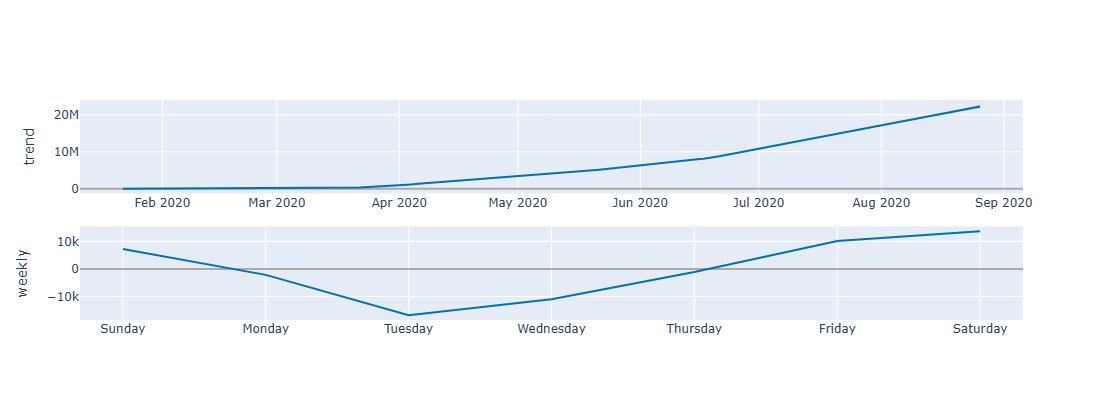

In [174]:
from prophet.plot import plot_components_plotly

fig2 = plot_components_plotly(model, forecast)
fig2.show()


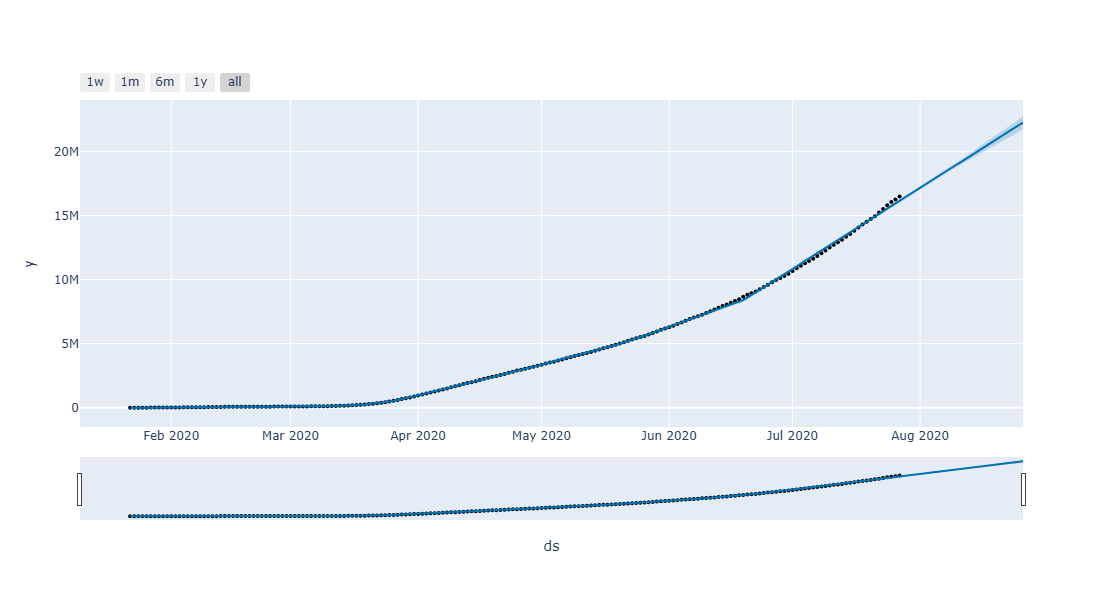

In [173]:
from prophet.plot import plot_plotly

fig = plot_plotly(model, forecast)
fig.show()
